<a href="https://colab.research.google.com/github/LeeZEun/2023S-Ajou-ML/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2

이번 과제에서는 대출의 승인 여부(Status)를 예측하는 데이터셋을 사용합니다.
<br>
HW1에서 제공한 데이터셋과는 다른 데이터셋입니다. bb에 업로드된 train.csv를 사용하여 과제를 진행해주세요.

[원본 데이터셋 링크](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set?select=loan_train.csv)

## 주의
✋ 작성한 모든 코드에 주석을 작성할 것
<br>
✋ 이번 과제에서는 보고서 제출 X, 다만 문제 풀이 파일을 제출해야 함!

## 코랩 연결 및 라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#cd # 경로 조정 # 경로는 본인의 환경에 맞게 조절 가능

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [4]:
df = pd.read_csv('drive/MyDrive/2023ML_HW2/train.csv') # 제공된 train.csv 사용 # 환경에 맞게 path 조절 가능

In [5]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


In [7]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


## 간단한 EDA

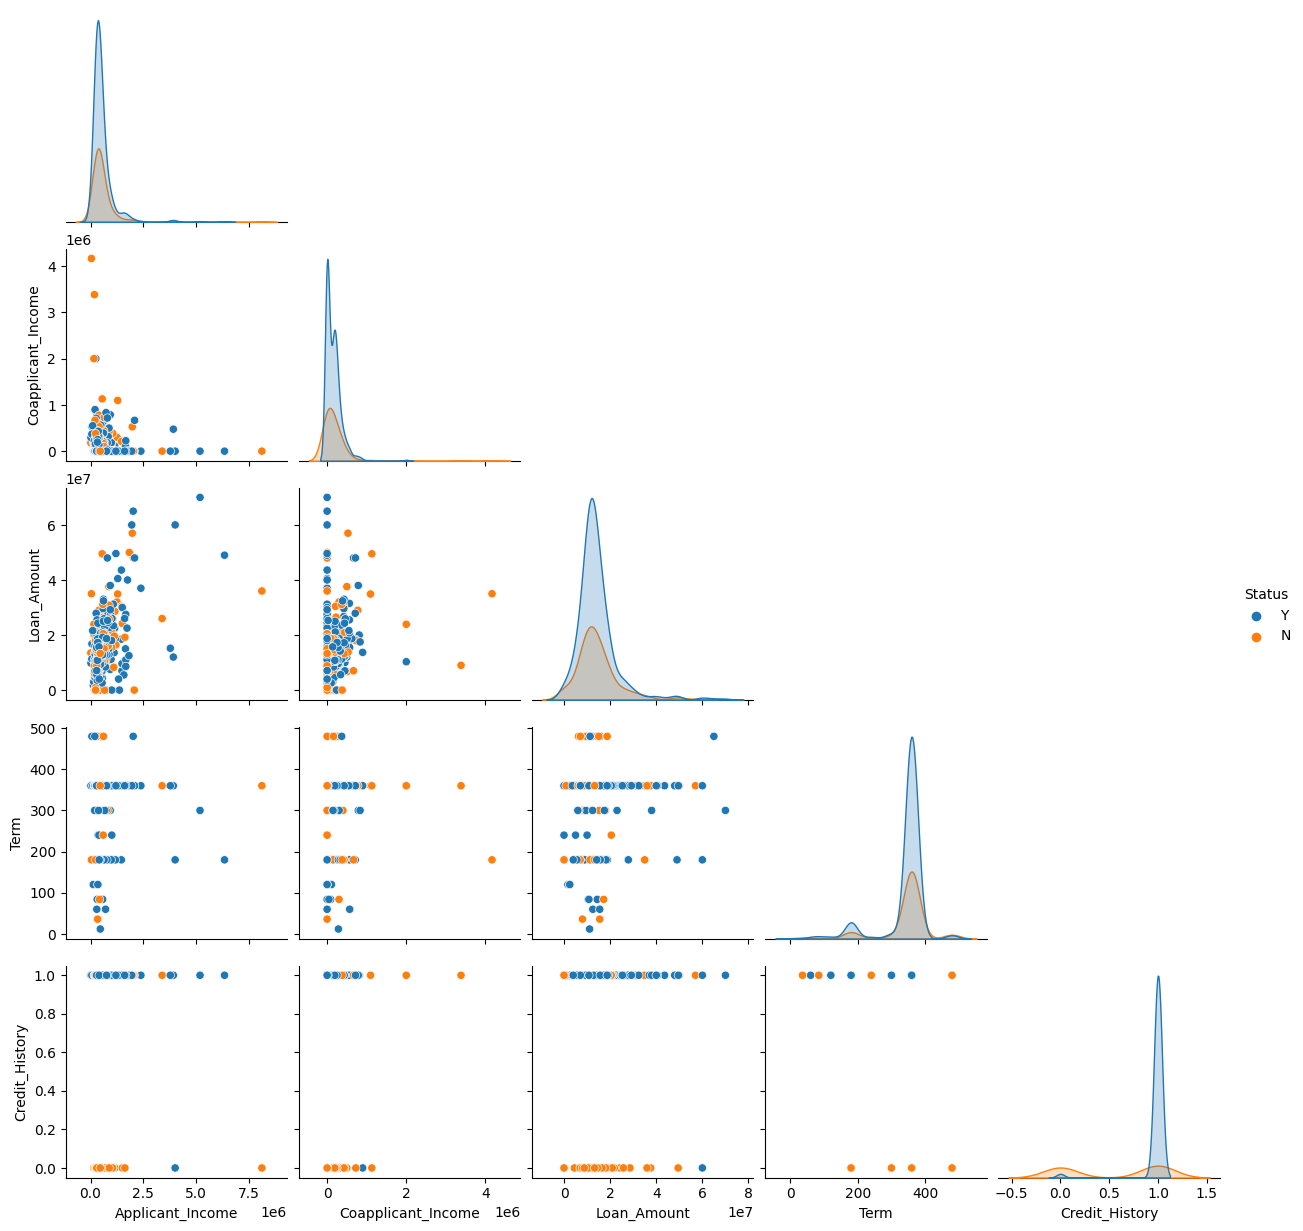

In [9]:
sns.pairplot(df,corner=True,hue='Status') # 이 데이터의 타겟 변수(예측하고자 하는 변수)는 'Status'입니다

<Axes: >

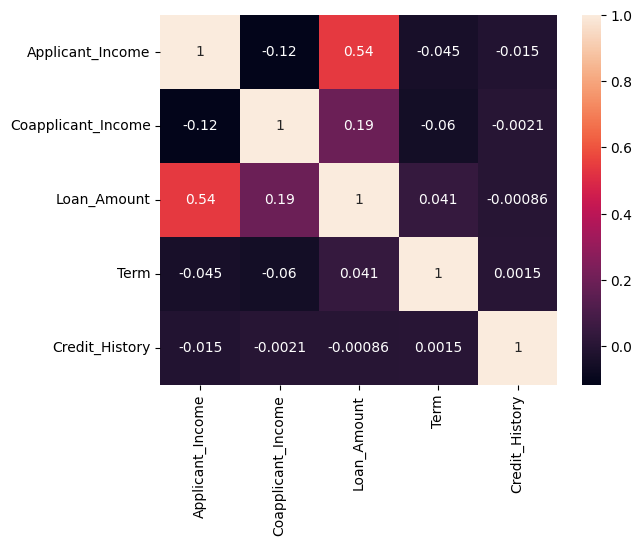

In [10]:
sns.heatmap(df.corr(),annot=True) # numerical feature들끼리의 correlation

## 결측치 확인

In [11]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

## 문제1: Categorical feature missing value drop
categorical feature에서 결측값이 있는 row를 삭제하세요.  
참고) sklearn 패키지에서 제공하는 imputer를 사용하면 최빈값으로 categorical feature의 결측 값도 채울 수 있으나, 편의 상 결측값이 있는 행을 삭제하겠습니다.

In [12]:
#df.size
df.shape

(614, 12)

In [13]:
## 문제 1 ##
# 코드 작성

# categorical columns
# Gender, Married, Dependents, Education, Self Employed, Credit History, Area, Status
# 결측값 들어있는 categorical columns
# Gender, Married, Dependents, Self Employed, Credit History

#결측값 들어있는 행 삭제하기
df.dropna(subset=['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History'], inplace=True)

###########

In [14]:
df.shape

(511, 12)

In [15]:
df.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  12
Credit_History         0
Area                   0
Status                 0
dtype: int64

## 문제2: Label Encoding
모든 categorical feature들을 Label Encoding하여 numerical feature로 바꾸세요.
* LabelEncoder()를 사용하세요

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
categorical = list(df.select_dtypes(include='object').columns) # categorical features들의 column name 모음

In [18]:
## 문제 2 ##
# 코드 작성

# categorical columns
# Gender, Married, Dependents, Education, Self Employed, Credit History, Area, Status

encoder = LabelEncoder()
for col in categorical:
  df[col] = encoder.fit_transform(df[col])

#encoder = LabelEncoder()
#df['Gender']=encoder.fit_transform(df['Gender'])
#df['Married']=encoder.fit_transform(df['Married'])
#df['Dependents']=encoder.fit_transform(df['Dependents'])
#df['Education']=encoder.fit_transform(df['Education'])
#df['Self_Employed']=encoder.fit_transform(df['Self_Employed'])
#df['Credit_History']=encoder.fit_transform(df['Credit_History']) #이미 되어있음
#df['Area']=encoder.fit_transform(df['Area'])
#df['Status']=encoder.fit_transform(df['Status'])

###########

In [19]:
df # categorical -> numerical 로 바뀌었는지 확인

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,290000,0.0,7100000,360.0,1.0,0,1
610,1,1,3,0,0,410600,0.0,4000000,180.0,1.0,0,1
611,1,1,1,0,0,807200,24000.0,25300000,360.0,1.0,2,1
612,1,1,2,0,0,758300,0.0,18700000,360.0,1.0,2,1


## 문제 3: KNN imputer
위에서 이 데이터셋의 numberical feature에도 결측치가 있음을 확인했습니다.   
categorical feature에서는 결측치가 있는 행을 drop하였지만 numerical feature 중 결측치가 있는 'Term'열에 대해서 KNN imputer를 사용하여 결측치를 채워봅시다.

### 문제 3-1
주어진 코드틀에 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 코드를 작성하세요.  
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

### 문제 3-2
주어진 코드틀에서 k개의 값을 보고 평균을 내어 결측값을 결정하는 코드를 작성하세요.
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [20]:
df.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  12
Credit_History         0
Area                   0
Status                 0
dtype: int64

In [21]:
import tqdm

In [22]:
class Knn_imputer():
  def __init__(self, n_neighbors): 
        
    ## 생성자로 최근접 이웃수(n_neighbors)를 입력 받습니다.
    self.k = n_neighbors
  
  ## knn 은 lazy learning 입니다.
  def fit(self,X):
      self.X = X
  
  def predict(self, X, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명
    
    for i in tqdm.tqdm(range(len(X))):
      if pd.isnull(X[feat_name].iloc[i]): # feat_name 열에 있는 결측값 확인

        distance = self.dist(X, X.iloc[i], feat_name) # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 함수
        
        sorted_dist = sorted(distance.items(), key=lambda x: x[1]) # distance 를 sorting 하기

         ################  문제 3-2  ####################
         # k개의 "feat_name" 값을 보고 평균 내어 값을 결정하기
         # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
         # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
        ################ 코드 시작  #####################

        sum = 0
        for j in range(self.k):
          sum += sorted_dist[j][1]
        sum = sum / self.k
        # print(X)
        # print(X_)
        df.iat[i,df.columns.get_loc(feat_name)] = sum
        
    return X

        ################ 코드 끝  ######################
        ##############################################
        
  
  def dist(self, X, y, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명
    num_train = X.shape[0]

    X = X.drop([feat_name], axis=1)
    y = y.drop([feat_name])
    dist_dict = {} ## {index : distance} 형태

    for i in range(num_train):
    
    ################  문제 3-1  ####################
    # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하기
    # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
    # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
    ################ 코드 시작  #####################
        
      d = np.sum((X.iloc[i] - y) ** 2)
      dist_dict[i] = np.sqrt(d)

      #dist = np.linalg.norm(X.iloc[i] - y)
      #dist_dict[i] = dist
      
      #dist = np.sqrt(np.sum(np.square(X.iloc[i] - y)))
      #dist_dict[i] = dist

      #dist = np.sqrt(((X.iloc[i]-y)**2).sum())
      #dist_dict[i] = dist
     
    ################ 코드 끝  ######################
    ##############################################
    return dist_dict


In [23]:
#normalize
normalized_df=(df-df.mean())/df.std()

In [24]:
# 아래 숫자는 변경하셔도 상관 없습니다.
imputer = Knn_imputer(5)
imputer.fit(normalized_df)

# test set에 대해 predict를 진행합니다.
imputer.predict(normalized_df,'Term')

100%|██████████| 511/511 [00:02<00:00, 204.93it/s]


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,0.465019,-1.354729,-0.753895,-0.523237,-0.398020,0.097255,-0.610302,0.132220,0.277334,0.430409,1.235524,0.686802
1,0.465019,0.736711,0.226360,-0.523237,-0.398020,-0.130394,-0.021098,-0.133924,0.277334,0.430409,-1.315397,-1.453173
2,0.465019,0.736711,-0.753895,-0.523237,2.507523,-0.415044,-0.610302,-0.883965,0.277334,0.430409,1.235524,0.686802
3,0.465019,0.736711,-0.753895,1.907438,-0.398020,-0.490028,0.311013,-0.230704,0.277334,0.430409,1.235524,0.686802
4,0.465019,-1.354729,-0.753895,-0.523237,-0.398020,0.124407,-0.610302,0.023343,0.277334,0.430409,1.235524,0.686802
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.146241,-1.354729,-0.753895,-0.523237,-0.398020,-0.433026,-0.610302,-0.823478,0.277334,0.430409,-1.315397,0.686802
610,0.465019,0.736711,2.186872,-0.523237,-0.398020,-0.216166,-0.610302,-1.198498,-2.497859,0.430409,-1.315397,0.686802
611,0.465019,0.736711,0.226360,-0.523237,-0.398020,0.496988,-0.516530,1.378255,0.277334,0.430409,1.235524,0.686802
612,0.465019,0.736711,1.206616,-0.523237,-0.398020,0.409057,-0.610302,0.579825,0.277334,0.430409,1.235524,0.686802


In [25]:
df.isnull().sum() # 결측치가 채워졌는지 확인

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [26]:
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,290000,0.0,7100000,360.0,1.0,0,1
610,1,1,3,0,0,410600,0.0,4000000,180.0,1.0,0,1
611,1,1,1,0,0,807200,24000.0,25300000,360.0,1.0,2,1
612,1,1,2,0,0,758300,0.0,18700000,360.0,1.0,2,1


## 문제 4: correlation
DataFrame df에 대해서 correlation heatmap을 그린 후, Status에 가장 영향을 주는 feature는 무엇인지 서술하세요

* Status에 가장 영향을 주는 feature에 대한 서술
: correlation heatmap을 보면, Credit_History가 0.55로 Status로 가장 높은 correlation 값을 가진다. 따라서, Status에 가장 영향을 주는 feature는 Credit_History라고 할 수 있다.

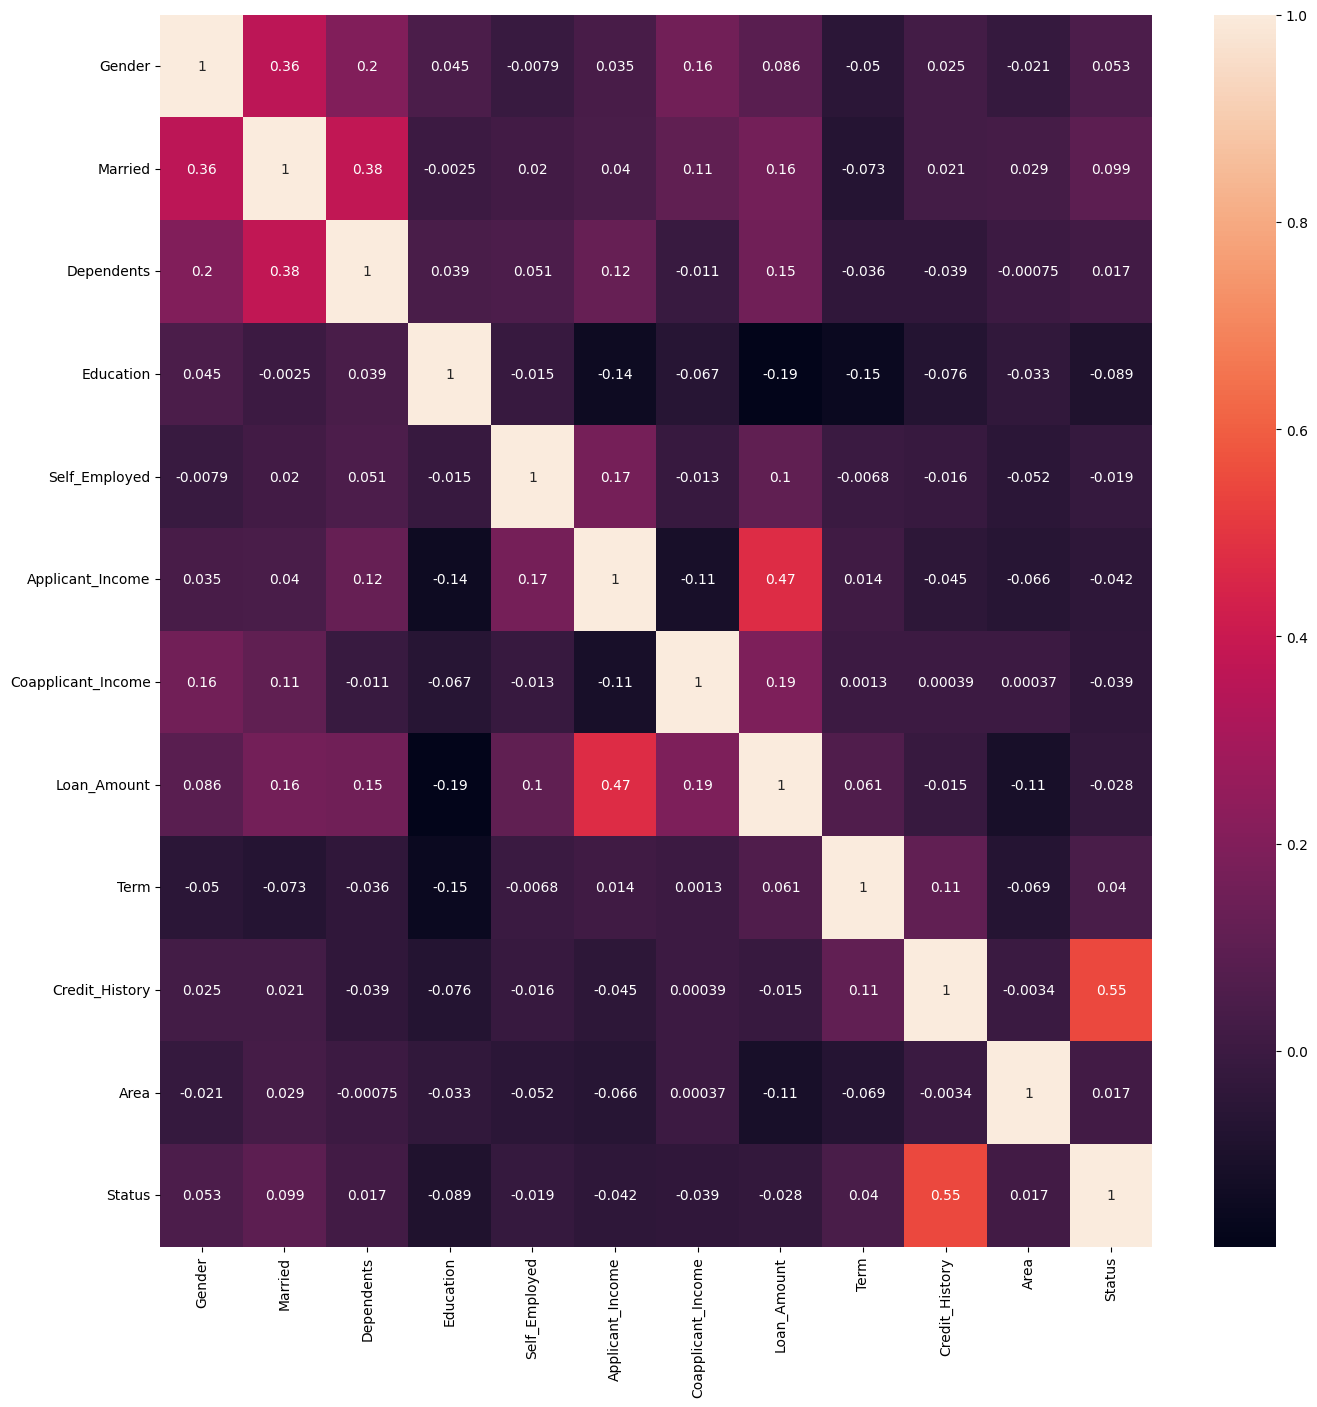

In [27]:
plt.figure(figsize = (16,16)) # figure 사이즈 조절

## 문제 4 ##
# 코드 작성

# numerical feature들끼리의 correlation
sns.heatmap(df.corr(), annot=True)
plt.show()

############

# 위 코드는 seaborn 라이브러리를 사용하여 correlation heatmap을 그리는 코드입니다.
# annot=True로 설정하면 각 셀에 correlation 값을 표시합니다.


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop('Status', axis=1) # target feature가 Status(대출의 승인 여부)
y = df['Status']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (408, 11)
y_train's shape :  (408,)

X_val's shape :  (51, 11)
y_val's shape :  (51,)

X_test's shape :  (52, 11)
y_test's shape :  (52,)


## 문제5: KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
#X_train.isna().sum()

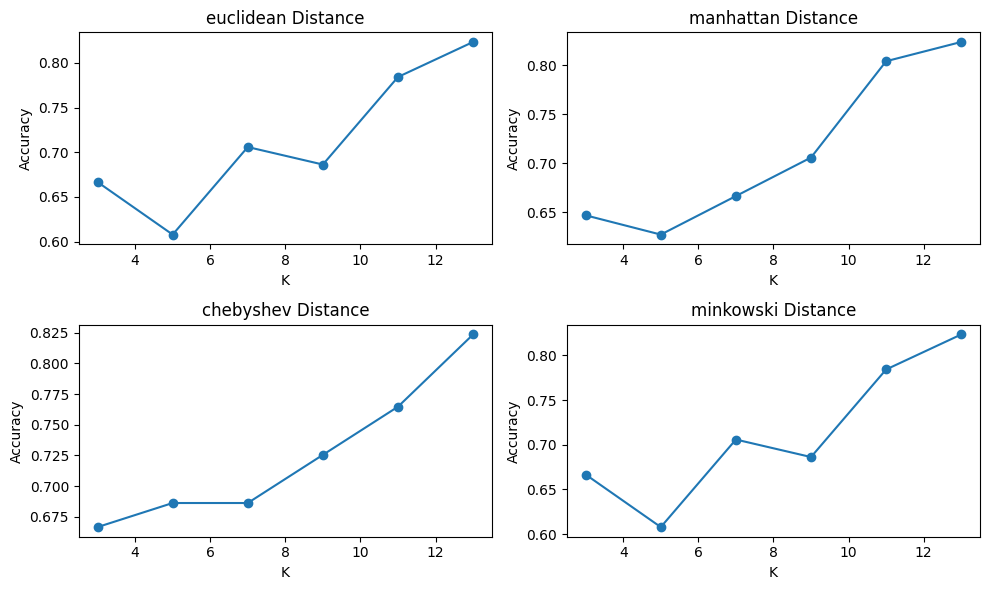

Best Parameters: Distance=euclidean, K=13
Test Accuracy: 0.6346


In [30]:
### 문제 5 ###
### 코드 작성 ###

# 거리 척도 리스트
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# k값 리스트
k_list = [3, 5, 7, 9, 11, 13]

# 결과를 저장할 딕셔너리
results = {}

# 모든 거리 척도와 k값에 대해 KNN 모델을 학습하고 검증
for distance in distance_metrics:
    for k in k_list:
        # KNN 모델 학습
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance)
        knn.fit(X_train, y_train)

        # 검증 데이터로 정확도 계산
        val_pred = knn.predict(X_val)
        val_acc = metrics.accuracy_score(y_val, val_pred)

        # 결과 딕셔너리에 저장
        results[(distance, k)] = val_acc

# 결과를 그래프로 출력
plt.figure(figsize=(10, 6))
for i, distance in enumerate(distance_metrics):
    plt.subplot(2, 2, i+1)
    plt.title(f'{distance} Distance')
    plt.plot(k_list, [results[(distance, k)] for k in k_list], '-o')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

# 최적의 파라미터 찾기
best_params = max(results, key=results.get)
print(f'Best Parameters: Distance={best_params[0]}, K={best_params[1]}')

# Test Set으로 정확도 계산
knn = KNeighborsClassifier(n_neighbors=best_params[1], metric=best_params[0])
knn.fit(X_train, y_train)
test_pred = knn.predict(X_test)
test_acc = metrics.accuracy_score(y_test, test_pred)
print(f'Test Accuracy: {test_acc:.4f}')

################

**설명 작성**  
- 최적의 파라미터: (Euclidean) K=13
- 설명: 현 결과에서는 euclidean 거리 척도에서 K=13일 때 최적의 파라미터라고 나온다. 이 조합에서 validation set에서 가장 높은 정확도를 보이고, 해당 조합으로 test set을 평가하면 약 0.63의 test accuracy가 나온다.

## 문제6 Cross validation with Linear SVM
### 6-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - C 이외의 하이퍼파라미터는 임의로 설정 가능
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 6-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - C 이외의 하이퍼파라미터는 임의로 설정 가능
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [31]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

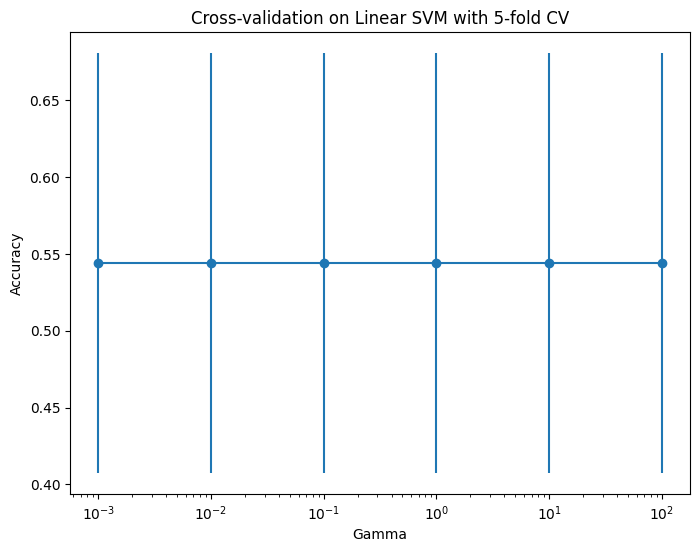

Best param : 0.0010
Test Accuracy : 0.6538


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [32]:
## 문제 6-1 ##
# 코드 작성

#5fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#cross-validation을 통해 평균 정확도와 각 fold의 정확도 구하기
#gamma_values = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
gamma_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# 결과를 저장할 리스트 초기화
mean_scores = []
scores_std = []

# C 값 범위 내 모든 C에 대해서 cross_val_score 계산하여 리스트에 저장
for param in gamma_values:
    svc = LinearSVC(C=param, random_state=42)
    scores = cross_val_score(svc, X_train, y_train, cv=kf)
    mean_scores.append(np.mean(scores))
    scores_std.append(np.std(scores))

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.errorbar(gamma_values, mean_scores, yerr=scores_std, fmt='-o')
plt.xscale('log')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('Cross-validation on Linear SVM with 5-fold CV')
plt.show()

# 최적 파라미터와 test accuracy 계산
best_param = gamma_values[np.argmax(mean_scores)]
svc = LinearSVC(C=best_param, random_state=42)
svc.fit(X_train, y_train)
test_acc = svc.score(X_test, y_test)

print("Best param : {:.4f}".format(best_param))
print("Test Accuracy : {:.4f}".format(test_acc))

############

**설명 작성**  
- 최적의 파라미터: 0.001
- 설명: 이번 실행에서 최적의 파라미터는 0.001, test accuracy는 약 0.65가 나온다.

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

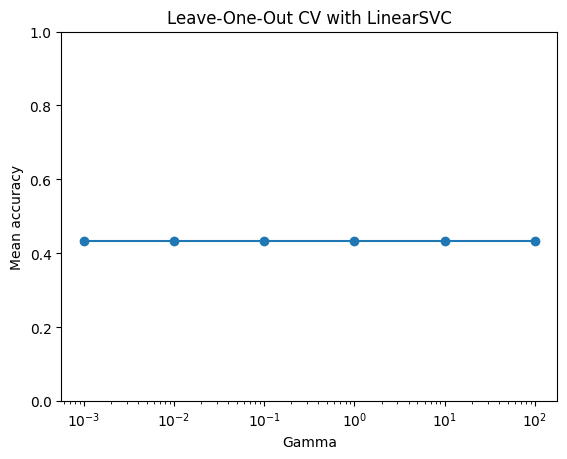

Best param : 0.0010
Test Accuracy : 0.6346


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [33]:
## 문제 6-2 ##
# 코드 작성

# 파라미터 C의 후보 값 생성
#c_values = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

# Leave-One-Out CV를 이용하여 최적의 C 값 찾기
loo = LeaveOneOut()
scores = []
for param in gamma_values:
    clf = LinearSVC(C=param, random_state=0)
    score = cross_val_score(clf, X_train, y_train, cv=loo)
    scores.append(score.mean())

# 각 C 값별 평균 정확도를 그래프로 그리기
plt.plot(gamma_values, scores, marker='o')
plt.xscale('log')
plt.xlabel('Gamma')
plt.ylabel('Mean accuracy')
plt.ylim(0.0,1.0)
plt.title('Leave-One-Out CV with LinearSVC')
plt.show()

# 최적의 C 값을 찾기
best_param = gamma_values[np.argmax(scores)]

# 최적의 C 값을 이용하여 모델을 학습시키고, 테스트 정확도 계산하기
clf = LinearSVC(C=best_param, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred)

print("Best param : {:.4f}".format(best_param))
print("Test Accuracy : {:.4f}".format(test_accuracy))

############

**설명 작성**  
- 최적의 파라미터: 0.001
- 설명: 이번 실행에서 최적의 파라미터는 0.001, test accuracy는 약 0.63이 나온다.

## 문제7 Cross validation with SVM
### 7-1: k-fold
- 문제6-1 코드에서 kernel을 바꾸어 k-fold를 진행하세요
- C는 2로 설정하고 k=5로 설정합니다.

### 7-2: Leave One Out
- 문제6-2 코드에서 kernel을 바꾸어 Leave one out를 진행하세요
- C는 2로 설정합니다.

### 7-3: 데이터의 특성
문제 6의 결과와 7-1, 7-2의 결과를 비교하여 보았을 때 주어진 데이터는 어떤 관계인지 (선형, 비선형)인지 적고, 왜 그런지 그 이유를 서술하세요


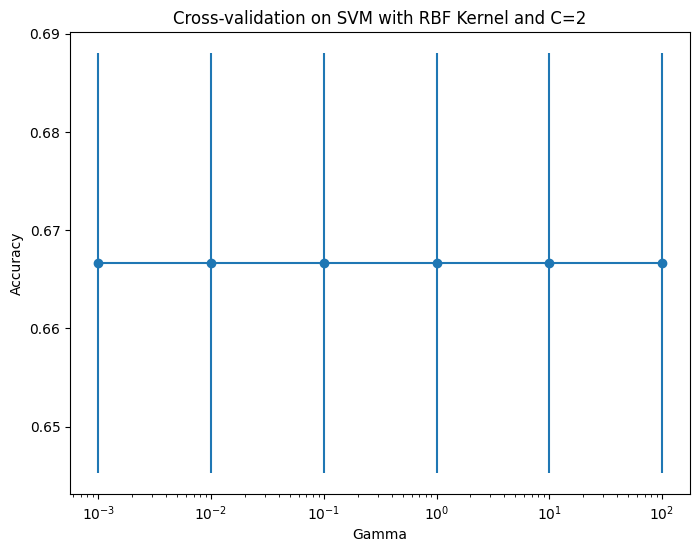

Cross validation scores :  [0.64634146 0.70731707 0.65853659 0.66666667 0.65432099]
Mean score :  0.6666365552544414
Best gamma : 0.0010
Test Accuracy : 0.6923


In [35]:
## 문제 7-1 ##
# 코드 작성

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# gamma 값 범위
#gamma_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# 결과를 저장할 리스트 초기화
mean_scores = []
scores_std = []

# gamma 값 범위 내 모든 gamma에 대해서 cross_val_score 계산하여 리스트에 저장
for param in gamma_values:
    svc = SVC(kernel='rbf', gamma=param, C=2, random_state=42)
    scores = cross_val_score(svc, X_train, y_train, cv=kf)
    mean_scores.append(np.mean(scores))
    scores_std.append(np.std(scores))

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.errorbar(gamma_values, mean_scores, yerr=scores_std, fmt='-o')
plt.xscale('log')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('Cross-validation on SVM with RBF Kernel and C=2')
plt.show()

# 최적 파라미터와 test accuracy 계산
best_param = gamma_values[np.argmax(mean_scores)]
svc = SVC(kernel='rbf', gamma=best_param, C=2, random_state=42)
svc.fit(X_train, y_train)
test_acc = svc.score(X_test, y_test)

print('Cross validation scores : ', scores)
print('Mean score : ', scores.mean())
print("Best gamma : {:.4f}".format(best_param))
print("Test Accuracy : {:.4f}".format(test_acc))

# SVM 모델 생성
#svm_model = SVC(kernel='rbf', C=2)

# K-Fold 교차검증 수행
#kfold = KFold(n_splits=5, shuffle=True)
#scores = cross_val_score(svm_model, X, y, cv=kfold)

# 교차검증 결과 출력
#print('Cross validation scores: ', scores)
#print('Mean score: ', scores.mean())

############

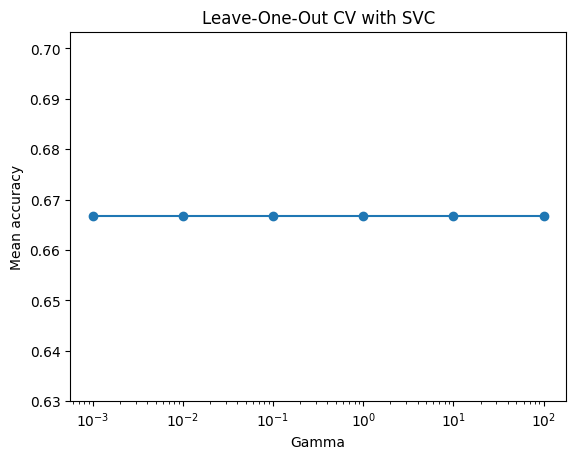

Best gamma: 0.0010
Test Accuracy: 0.6923


In [36]:
## 문제 7-2 ##
# 코드 작성

# Perform Leave-One-Out CV to find the optimal gamma value
loo = LeaveOneOut()
scores = []
for gamma in gamma_values:
    clf = SVC(C=2, kernel='rbf', gamma=gamma, random_state=0)
    score = cross_val_score(clf, X_train, y_train, cv=loo)
    scores.append(score.mean())

# Plot the mean accuracy for each gamma value
plt.plot(gamma_values, scores, marker='o')
plt.xscale('log')
plt.xlabel('Gamma')
plt.ylabel('Mean accuracy')
plt.title('Leave-One-Out CV with SVC')
plt.show()

# Find the optimal gamma value and train the model with it
best_gamma = gamma_values[np.argmax(scores)]
clf = SVC(C=2, kernel='rbf', gamma=best_gamma, random_state=0)
clf.fit(X_train, y_train)

# Test the model and compute accuracy
y_pred = clf.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred)

print("Best gamma: {:.4f}".format(best_gamma))
print("Test Accuracy: {:.4f}".format(test_accuracy))

############

**7-3 설명 작성**  
- 설명: 문제 6의 결과와 문제 7의 결과를 비교해보면, kernel을 바꾸어도 결과는 크게 차이가 나지 않는다. 따라서 이 데이터셋은 선형적인 관계라고 추정할 수 있다. 하지만 특정 feature들이 비선형적인 관계를 가질 수도 있으므로, kernel을 바꿔가며 다양한 모델을 학습시켜봐야 한다.

## 문제 8: Grid search
### 문제 8-1
주어진 param_grid에 대해서 RandomForestClassifier에 GridSearch cross validation(cv=5)을 수행하는 코드를 작성하고 best hyperparameter를 출력하세요.  
* 아래의 주어진 패키지를 사용합니다.



In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [38]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [39]:
## 문제 8-1 ##
## 코드 작성 ##

clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Hyperparameter:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

############

Best Hyperparameter: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 500}
Best Score: 0.8113821138211381


### 문제 8-2
8-1에서 구한 best parameter를 사용하여 최종적인 RandomForestClassifier를 만든 후 train 데이터로 학습 후, `accuracy_score`를 사용하여 test accuracy를 출력하세요.

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
## 문제 8-2 ##
## 코드 작성 ##

#gini로 모델 생성
rf = RandomForestClassifier(n_estimators=200, max_depth=6, max_features='log2', criterion='gini')

#모델학습 및 예측
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#테스트 데이터 정확도 계산
test_acc = accuracy_score(y_test, y_pred)

print('Test set accuracy:', test_acc)

############

Test set accuracy: 0.7884615384615384
